In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
url = 'pca_iris.data'

df = pd.read_csv(url,names=["sepal length","sepal width","petal lenght","petal width","target"])

df.head()

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = list(df.columns.values)
features.pop(4)
features

['sepal length', 'sepal width', 'petal lenght', 'petal width']

In [4]:
x = df[features]
y = df['target']

In [6]:
x = StandardScaler().fit_transform(x)

In [7]:
x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

 **Not:** PCA 'da  min max normalizasyonu yapmıyoruz scaling kullanıyoruz, `StandartScaler()` kullanıyoruz.

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=["principal component 1","principal component 2"])

In [32]:
principalDf.head()  # yeni boyutlar herhangi bir anlam ifade etmiyor.

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [33]:
final_dataframe = pd.concat([principalDf,y],axis=1)
final_dataframe.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


#### Veriyi görselleştirelim

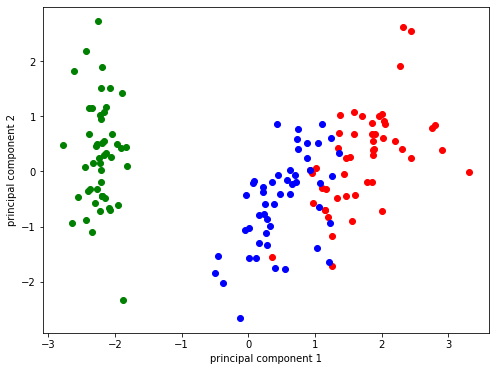

In [39]:
dfsetosa = final_dataframe[df.target=="Iris-setosa"]
dfvirginica = final_dataframe[df.target=="Iris-virginica"]
dfversicolor = final_dataframe[df.target=="Iris-versicolor"]

plt.figure(figsize=(8,6))
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

plt.scatter(dfsetosa["principal component 1"],dfsetosa["principal component 2"],color="green")
plt.scatter(dfvirginica["principal component 1"],dfvirginica["principal component 2"],color="red")
plt.scatter(dfversicolor["principal component 1"],dfversicolor["principal component 2"],color="blue")
plt.show()


#### **Daha profesyonel bir çizim** 

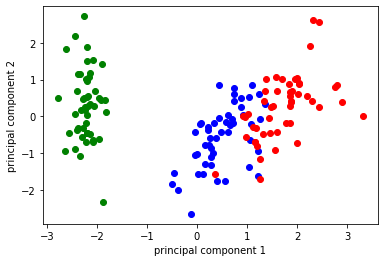

In [61]:
species = list(df.target.unique())
colors = ["g","b","r"]

for type_,c in zip(species,colors):
    dftemp = final_dataframe[df.target==type_] 
    plt.scatter(dftemp["principal component 1"],dftemp["principal component 2"],color=c)
    
    # birden fazla değişkenin içinde for loop yapmak için `zip()` keywordu kullanlımalıdır.

plt.xlabel("principal component 1")
plt.ylabel("principal component 2");

In [63]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [64]:
pca.explained_variance_ratio_.sum()

0.9580097536148197